In [2]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc
import scipy.stats as stats

%matplotlib inline
%precision 4
plt.style.use('ggplot')

In [4]:
#np.random.seed(1234)
import mpld3

## Estimating parameters of an ideal flash method response

In [5]:
def mu1(a, b, c, x): # One dimensional ideal model (an instantaneous heat pulse, no heat losses)
    suma =0.0
    for n in range(1, 50):
        suma = suma + (-1)**n*np.exp(-((n*np.pi)**2*a*x))
    
    return b*(1+2.0*suma)+c

In [12]:
# observed data
n = 15
a = 0.5
b = 2.0
c = 0.0
sigma = 0.03
x = np.linspace(0.01, 1.9, n)
y_obs = mu1(a, b, c, x) + np.random.normal(0, sigma, n)
data = pd.DataFrame(np.array([x, y_obs]).T, columns=['x', 'y'])
data

x         y
0   0.010  0.077137
1   0.145  0.262279
2   0.280  0.979722
3   0.415  1.501123
4   0.550  1.745558
5   0.685  1.836240
6   0.820  1.962419
7   0.955  1.945857
8   1.090  1.973112
9   1.225  1.987950
10  1.360  1.988552
11  1.495  2.035449
12  1.630  1.964836
13  1.765  1.995249
14  1.900  1.985626

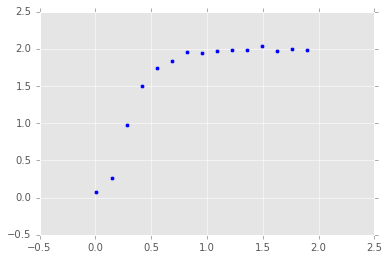

In [16]:
from matplotlib import pyplot as plt
plt.scatter(x,y_obs)


In [17]:
# define priors
a = pymc.Gamma('alpha', alpha=1, beta=10)
b = pymc.Gamma('tmax', alpha=1, beta=0.5)
from pymc import DiscreteUniform, Exponential, Poisson, deterministic
#a = pymc.Exponential('alpha', beta=0.8)
#b = pymc.Exponential('tmax',  beta=0.8)
c = pymc.Normal('baseline', mu=0, tau=2.0/10**0)
tau = pymc.Gamma("tau", alpha=0.8, beta=0.8)

# define likelihood
@pymc.deterministic
def mu(a=a, b=b, c=c, x=x):
    suma =0.0
    for n in range(1, 50):
        suma = suma + (-1)**n*np.exp(-((n*np.pi)**2*a*x))
   
    return b*(1+2.0*suma)+c
    
y = pymc.Normal('y', mu=mu, tau=tau, value=y_obs, observed=True)

# inference
m = pymc.Model([a, b, c, tau, x, y])
mc = pymc.MCMC(m)
mc.sample(iter=11000, burn=10000)

C:\Users\jgembarovic\AppData\Local\Continuum\Anaconda3\lib\site-packages\pymc\InstantiationDecorators.py:101: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  (args, varargs, varkw, defaults) = inspect.getargspec(__func__)


 [-----------------100%-----------------] 11000 of 11000 complete in 15.6 sec

C:\Users\jgembarovic\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\jgembarovic\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\jgembarovic\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


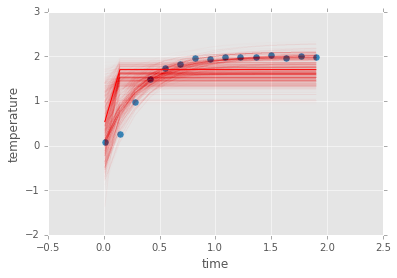

In [18]:
abar = a.stats()['mean']
bbar = b.stats()['mean']
cbar = c.stats()['mean']
data.plot(x='x', y='y', kind='scatter', s=50);
xp = np.array(x)  #[x.min(), x.max()])
plt.plot(xp, mu1(a.trace(), b.trace(), c.trace(), xp[:, None]), c='red', alpha=0.01)
plt.plot(xp, mu1(abar,bbar,cbar,xp), linewidth=1.1, c='red');
#plt.suptitle('Flash Method MCMC')
plt.xlabel('time')
plt.ylabel('temperature')
plt.savefig('flashMCMC.png', format='png', dpi=300)

Plotting tmax
Plotting tau
Plotting alpha
Plotting baseline


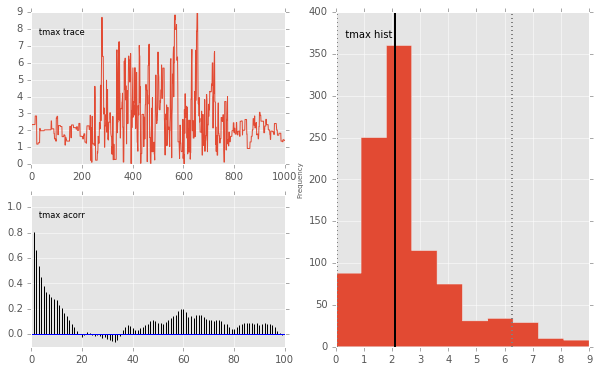

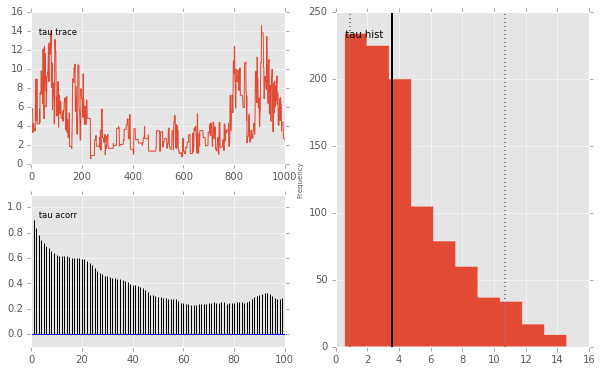

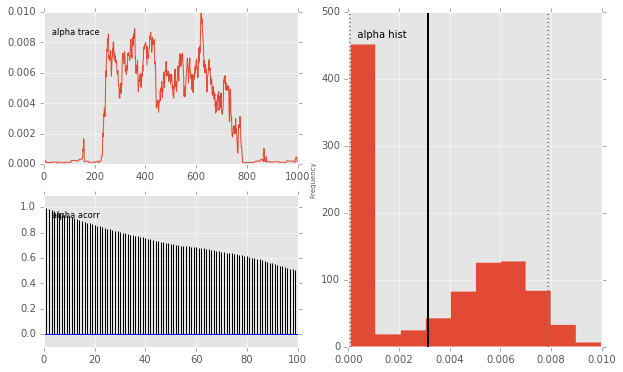

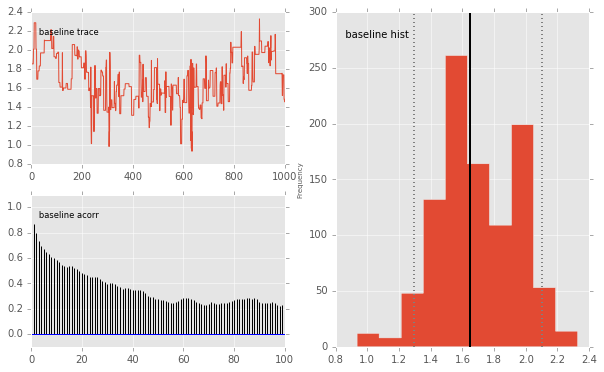

In [19]:
pymc.Matplot.plot(mc, )

In [20]:

import numpy as np
samples = np.array([a.trace(),b.trace(), c.trace(), tau.trace()]).T
# pip install corner or pip install triangle_plot
import corner
figure = corner.corner(samples, color="b", bins=30, filled= True, smooth=(1),fill_contours=False,
                       labels=['alpha','tmax','baseline', 'tau'], 
                truths=[0.5, 2.0, 0.0, tau])
#plt.savefig('test111.eps', format='eps', dpi=1000)
#plt.savefig('test112.png', format='png', dpi=500)

ImportError: No module named 'corner'

In [11]:
#abar = a.stats()['mean']
#bbar = b.stats()['mean']
abar, bbar, cbar

(0.3769, 1.6969, 0.3613)